In [1]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Understanding the Gradient descent  for Linear Data

In [2]:
# Generate data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)


In [3]:
# Define a range of lambda values
lambdas = np.logspace(-3, 2, 50)

In [4]:
# Store slopes and cost function values
slopes = []
costs = []

for lam in lambdas:
    model = Ridge(alpha=lam, fit_intercept=True)  # Ridge as an example
    model.fit(X, y)
    
    # Store the sum of absolute slopes (magnitude of coefficients)
    slopes.append(np.sum(np.abs(model.coef_)))
    
    # Compute cost function: MSE + Regularization
    predictions = model.predict(X)
    mse = np.mean((y - predictions) ** 2)
    reg_term = lam * np.sum(model.coef_ ** 2)  # Ridge regularization
    costs.append(mse + reg_term)


In [5]:
import pandas as pd

# Convert generated data to a DataFrame for easier handling
columns = [f'Feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y



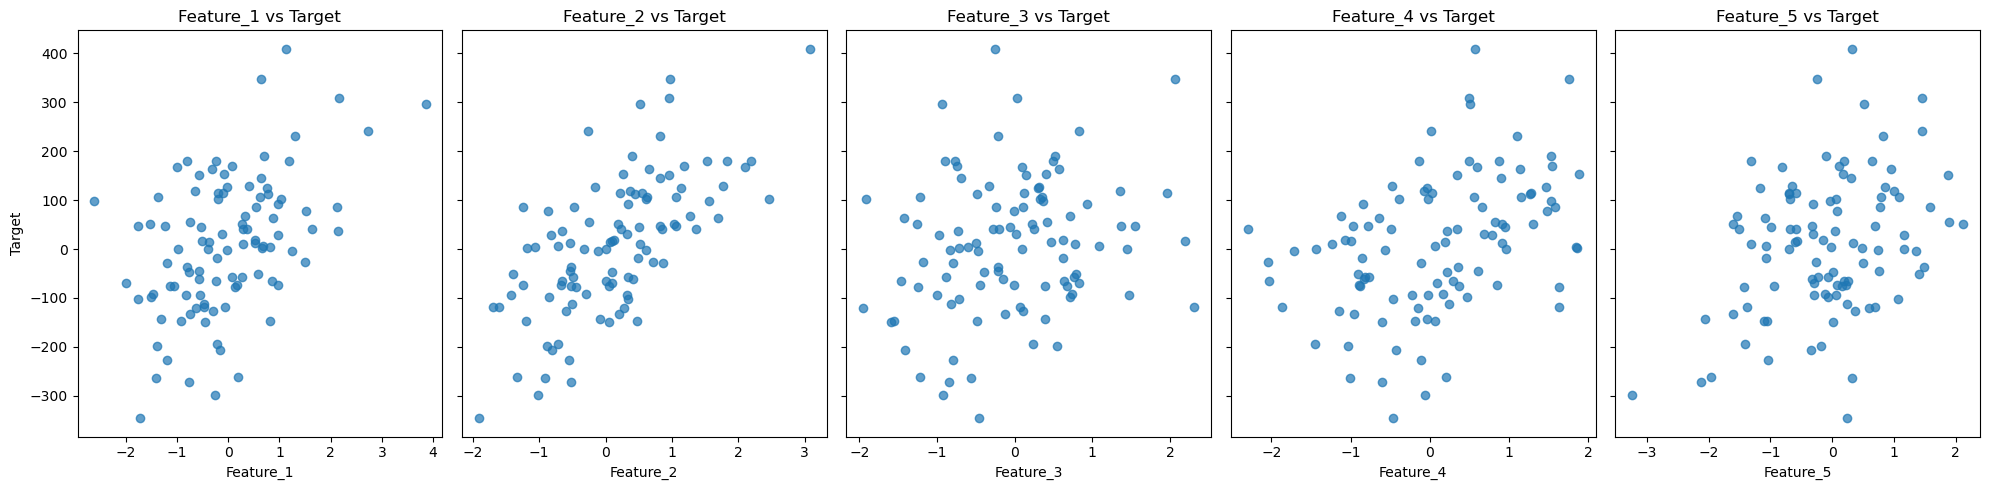

In [6]:
# Plot scatter plots for each feature vs. the target
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5), sharey=True)

for i, feature in enumerate(columns):
    axes[i].scatter(df[feature], df['Target'], alpha=0.7)
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    if i == 0:
        axes[i].set_ylabel('Target')

plt.tight_layout()
plt.show()

In [7]:
# Convert generated data to a DataFrame
columns = [f'Feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y

In [8]:
# Calculate the correlation matrix
correlation_with_target = df.corr()['Target'].drop('Target')


In [9]:

# Display the correlations
print("Correlation between each feature and the target variable:")
print(correlation_with_target)

Correlation between each feature and the target variable:
Feature_1    0.468552
Feature_2    0.662474
Feature_3    0.213166
Feature_4    0.405168
Feature_5    0.340805
Name: Target, dtype: float64


In [11]:
import seaborn as sns

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

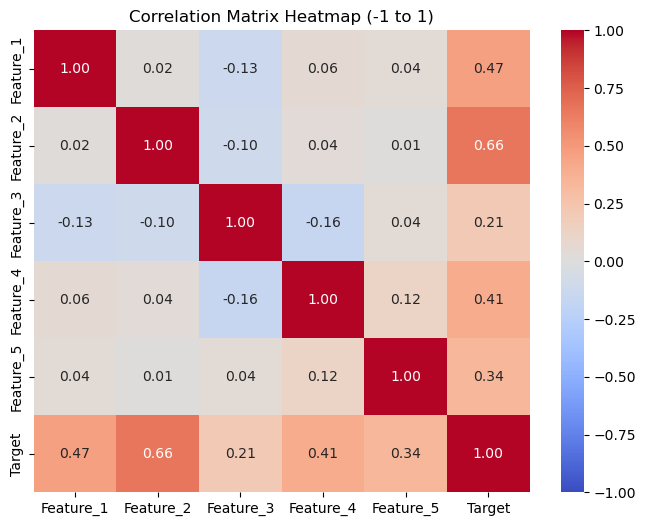

In [36]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (-1 to 1)")
plt.show()

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature (excluding the target variable)
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display VIF scores
print(vif_data)

     Feature         VIF
0  Feature_1   51.233056
1  Feature_2  105.582435
2  Feature_3   35.889401
3  Feature_4   34.634399
4  Feature_5   15.137352
5     Target  225.052585


In [44]:
df = df.drop(columns=['Feature_2'])

In [46]:
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display VIF scores
print(vif_data)

     Feature       VIF
0  Feature_1  1.500765
1  Feature_3  1.275144
2  Feature_4  1.404534
3  Feature_5  1.153900
4     Target  2.158500


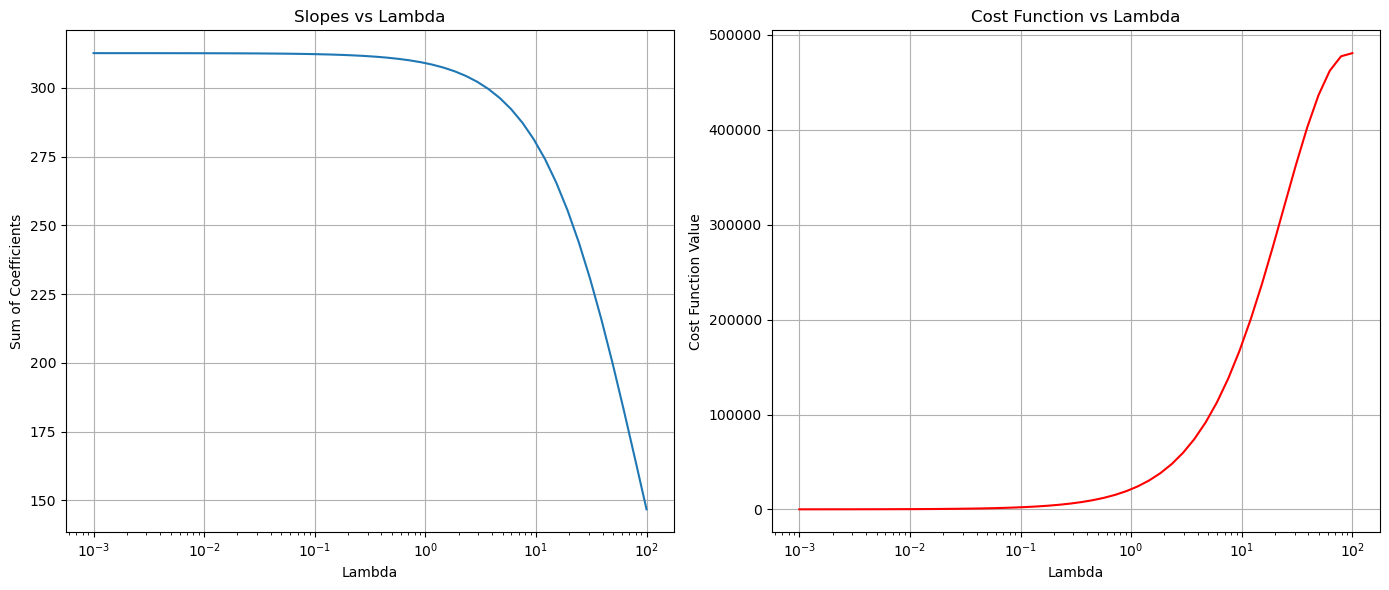

In [48]:
# Plot slopes vs lambda
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lambdas, slopes, label="Sum of Coefficients")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Sum of Coefficients")
plt.title("Slopes vs Lambda")
plt.grid(True)

# Plot cost vs lambda
plt.subplot(1, 2, 2)
plt.plot(lambdas, costs, label="Cost Function", color='red')
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Lambda")
plt.grid(True)

plt.tight_layout()
plt.show()


## Behavior of Slopes (Coefficients):

- In regularized regression methods (like Ridge, Lasso, or Elastic Net), as the value of 
𝜆
- λ (regularization parameter) increases:
- The regularization term penalizes large coefficients.
- This causes the slopes (coefficients) to shrink, often toward zero.
- For Lasso or Elastic Net, some coefficients might become exactly zero (feature selection) as 
𝜆 increases.

## Behavior of Cost Function:

- The cost function is the sum of:
- The Residual Error (MSE): Measures the model's fit to the data.
- The Regularization Term: Increases as 𝜆 increases.
    - As 𝜆 increases:The regularization term dominates, making the cost function larger, even though the residual error might decrease.

## Gradient Descent Plot:

- A Gradient Descent Plot shows how coefficients (slopes) and the cost function evolve for different values of 𝜆
- As 𝜆 increases:
     - The slopes (coefficients) decrease in magnitude.
     - The cost function value increases due to the added penalty term.


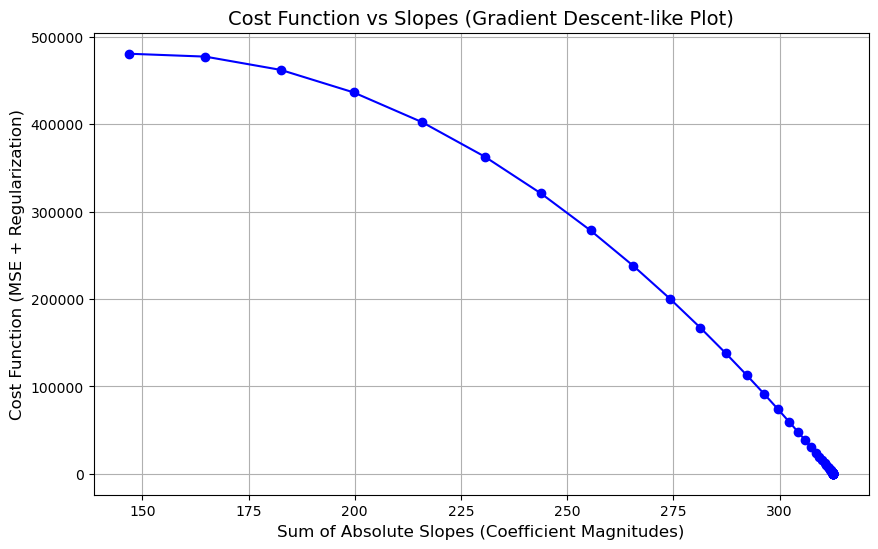

In [53]:
# Plot gradient descent-like plot (Cost Function vs Slopes)
plt.figure(figsize=(10, 6))
plt.plot(slopes, costs, marker='o', linestyle='-', color='blue')
plt.title("Cost Function vs Slopes (Gradient Descent-like Plot)", fontsize=14)
plt.xlabel("Sum of Absolute Slopes (Coefficient Magnitudes)", fontsize=12)
plt.ylabel("Cost Function (MSE + Regularization)", fontsize=12)
plt.grid(True)
plt.show()

## Insights from the Gradient Descent Plot:

### Slope vs. Cost Function Relationship:
- Initially, as slopes are large, the cost function is lower due to better data fitting (low MSE).
- As slopes shrink with increasing regularization, the cost function increases, even if MSE improves slightly, because the regularization term grows more rapidly.

### Trade-off:
- Lower slopes (smaller coefficients) are desirable to prevent overfitting.
- However, overly small slopes can lead to underfitting, increasing the overall cost.